In [3]:
# init weaviate client
import weaviate
def init_client():
    return weaviate.Client(url="http://localhost:8081")

client = init_client()

WeaviateStartUpError: Weaviate did not start up in 5 seconds. Either the Weaviate URL http://localhost:8081 is wrong or Weaviate did not start up in the interval given in 'startup_period'.

In [ ]:
# get all tracks
def get_all_tracks(client):
    print("Getting all tracks...")
    result = client.data_object.get(class_name="Track", with_vector=True, limit=10000)

    tracks = result["objects"]

    print("Done.")
    return tracks

# save tracks
def save_tracks(tracks):
    print("Saving tracks...")
    import pickle
    with open("data/tracks.pkl", "wb") as f:
        pickle.dump(tracks, f)

# read tracks
def read_tracks():
    print("Reading tracks...")
    import pickle
    with open("data/tracks.pkl", "rb") as f:
        tracks = pickle.load(f)
    return tracks

# tracks = get_all_tracks(client)
# save_tracks(tracks)
tracks = read_tracks()

print(f"Length of tracks: {len(tracks)}")

Reading tracks...
Length of tracks: 10000


In [ ]:
def get_all_vectors(tracks):
    print("Getting all vectors...")
    vectors = [o["vector"] for o in tracks]
    return vectors

vectors = get_all_vectors(tracks)
print(tracks[0])

print(f"Length of vectors: {len(tracks)}")

Getting all vectors...
{'class': 'Track', 'creationTimeUnix': 1686147506358, 'id': '00053c48-1ce9-45b4-830d-ec01206e0de8', 'lastUpdateTimeUnix': 1686147506358, 'properties': {'acousticness': 0.41, 'album_id': '7tB40pGzj6Tg0HePj2jWZt', 'album_name': 'News Of The World (2011 Remaster)', 'album_release_date': '1977-10-28', 'artist_name': 'Queen', 'danceability': 0.446, 'duration_ms': 230120, 'energy': 0.713, 'genre': 'rock', 'instrumentalness': 0, 'key': 8, 'liveness': 0.212, 'loudness': -4.825, 'lyrics': "Get down, make love Get down, make love Get down, make love Get down, make love You take my body, I give you heat You say you're hungry, I give you meat I suck your mind, you blow my head Make love (Make love) inside your bed Everybody get down, make love Get down, make love Get down, make love Get down, make love Every time I get hot, you wanna cool down Every time I get high, you say you wanna come down You say it's enough, in fact, it's too much Every time I get a, get down, get down

Visualizing vectors...


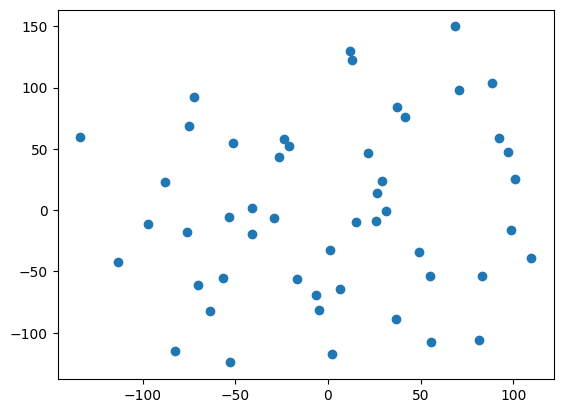

In [ ]:
# visualize vectors
def visualize_vectors(vectors):
    print("Visualizing vectors...")
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.manifold import TSNE

    # convert to numpy array
    vectors = np.array(vectors)

    # cut to 100
    vectors = vectors[:50]
    # reduce dimensionality
    tsne = TSNE(n_components=3, random_state=0)
    vectors_2d = tsne.fit_transform(vectors)

    # categorize by genre
    
    # plot
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
    plt.show()

# todo: visualize query


visualize_vectors(vectors)

Visualizing query...


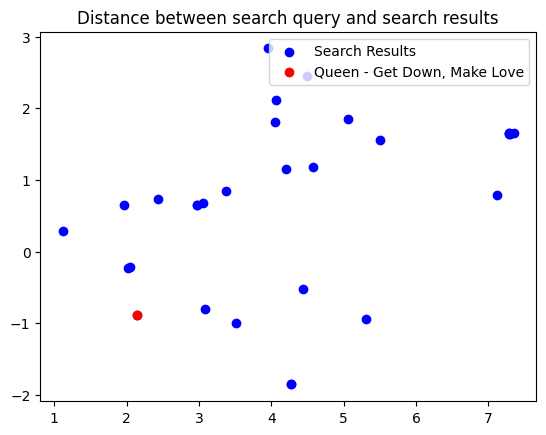

In [ ]:

# Example: Queen - Get Down, Make Love - Remastered 2011
import pandas as pd


example_vector = [-0.06430846, -0.24293041, 0.110439375, -0.100999914, 0.09629649, -0.04072969, -0.169328, -0.014131491, 0.117915705, 0.5358003, 0.13591173, 0.1179824, -0.08689239, 0.060807075, 0.09822265, 0.19681141, -0.14886066, 0.060191516, -0.46446335, -0.016015284, 0.06305353, 0.14932896, -0.25746924, 0.1558214, -0.2350968, -0.44718155, 0.27163702, -0.54405105, -0.09141091, 0.050858628, 0.34632823, 0.48786363, 0.32426932, 0.5739468, 0.23869427, -0.3895692, 0.04086138, 0.30526224, -0.09721386, 0.7694963, -0.23109816, 0.25778306, 0.06246513, -0.15824226, -0.07554409, 0.4262448, 0.3915728, -0.10568536, -0.3647673, 0.012407957, -0.6349575, -0.2149216, -0.2833733, -0.45024365, -0.09075926, 0.13799985, -0.096156955, -0.15037905, 0.1893991, 0.1821173, 0.57067454, -0.8982235, -0.4192168, -0.25409874, 0.298224, -0.22855514, -0.17255244, -0.2956281, -0.19140317, -0.08400424, -0.14878975, 0.08089396, 0.11062146, -0.19968952, 0.5094097, -0.5838567, -0.17085947, 0.096286826, 0.2912769, 0.11041665, -0.09463574, -0.781021, 0.15997428, 0.11306844, 0.78838485, 0.046952806, 0.20534825, -0.013530162, 0.13570505, 0.39102194, -0.01179285, 0.21663925, -0.24078456, 0.30120635, -0.027091846, 0.14774093, -0.29773268, -0.42512724, -0.11435961, 0.18203783, -0.41414407, -0.20505615, 0.8132204, 0.018949207, -0.14595698, -0.15278365, -0.112690575, -0.5838136, -0.21263546, -0.13692501, -0.008073677, -0.13169445, 0.24559294, 0.11468319, -0.30848005, -0.56463796, 0.080196455, -0.13245742, -0.1404417, 0.081029356, 0.18065631, 0.31255183, 0.10336783, 0.13753967, 0.022072855, 0.14859243, 1.6029545, 0.46531165, -0.20865615, 0.012292662, 0.15616858, -0.45227888, -0.77387786, -0.43062842, 0.016371612, 0.3711838, 0.5039181, 0.15240684, -0.1913129, -0.27780148, -0.009997403, 0.117378555, -0.0085565215, -0.07294885, -0.024712797, 0.42950535, -0.005417766, -0.041284315, -0.1248916, -0.09128173, 0.345162, 0.2769205, -0.3914345, 0.057552766, -0.027560443, 0.5258812, 0.10822242, 0.31862304, -0.6082464, -0.22113307, -0.6233102, -0.34389177, -0.1452825, -0.1252571, -0.12338128, 0.4402884, 0.34804556, -0.13827753, -0.08136732, -0.306151, -0.18906707, 0.39232698, -0.09769015, 0.18603276, -0.517225, -0.7027275, 0.034595076, -0.24334815, 0.17681517, 0.28136656, -0.35619092, -1.133969, 0.057308406, -0.5783666, 0.10168155, -0.109514184, -0.23636238, 0.091893405, 0.086915925, 0.54031307, 0.13154425, 0.39741704, 0.17699283, 0.339236, -0.2782195, 0.0015203763, -0.29165968, 0.35996062, -0.083890885, -0.030090114, -0.43646154, -0.17463323, 0.40066385, -0.087886214, -0.18553457, 0.39516634, 0.26139808, -0.31970882, 0.35820448, 0.10034503, -0.3061243, -0.036659196, -0.10865491, 0.4053416, -0.11471894, 0.43889588, 0.36892733, -0.12887777, 0.055665467, -0.047561377, -0.109102905, -0.08950873, -0.057528242, -0.2530506, 0.1425888, -0.11001377, -0.5834436, 0.20523982, -0.23291121, -0.41186935, -0.23352517, -0.41898695, 0.24615884, 0.63720244, 0.08238311, -0.32418433, 0.19017169, 0.3589935, 0.12049238, 0.33731705, -0.01893071, -0.1797846, 0.4786759, 0.20034383, 0.18493232, 0.09827406, 0.14285572, -0.17101601, 0.46751156, 0.12339927, -0.076471925, 0.2264648, 0.43471265, 0.10593008, 0.2955751, -0.08592804, -0.2486908, 0.091301665, -0.5648791, 0.036137637, 0.025429724, 0.2128401, 0.35821828, -0.2509771, -0.26594982, 0.18869537, -0.21725583, -0.35601154, -0.36929485, -0.29925507, -0.47262815, -0.041473743, 0.10217856, 0.062293913, -0.15322512, 0.08956682, -0.35481754, 0.058380894, 0.5370905, 0.40207297, 0.10658187, -0.31264502, 0.22212799, -0.05873761, 0.28276542, 0.04365597, 0.23748645, 0.29086804, 0.10375105, 0.32179505, -0.10878695, 0.17493275, 0.10128974, -0.046946246, -0.33823404, 0.33285227, -0.054822538, 0.25945452, 0.07178426, -0.14386761]



# visualize query
def vector_query(client, limit=50):

    query = ( 
        client.query
        .get("Track", ["track_name", "artist_name"])
        .with_additional("vector")
        .with_near_vector({"vector": example_vector})
        .with_limit(limit)
        .do()
    )

    
    results = []
    for q in query["data"]["Get"]["Track"]:
        result = {
            "track_name": q["track_name"],
            "artist_name": q["artist_name"],
            "vector": q["_additional"]["vector"]
        }
        results.append(result)

    
    return results

def get_vector(uuid):
    return client.data_object.get(uuid=uuid, class_name="Track", with_vector=True, limit=10000)

def visualize_query(search_query, results):
    print("Visualizing query...")
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.manifold import TSNE

    # convert to numpy array
    search_vectors = np.array(search_query)
    results_vectors = np.array([o["vector"] for o in results])

    

    # reduce dimensionality
    tsne = TSNE(n_components=2, random_state=0)
    # query_2d = tsne.fit_transform(search_vectors)
    results_2d = tsne.fit_transform(results_vectors)
    x = pd.Series(results_2d[:, 0])
    y = results_2d[:, 1]
    track_name = [o["track_name"] for o in results]

    # consruct dataframe
    df = pd.DataFrame({"x": x, "y": y, "track_name": track_name})
   
    # limit to 10
    df = df.head(30)
    # plot search query
    # plt.scatter(query_2d[:, 0], query_2d[:, 1], marker="o", label="Search Query")
    # plot search results
    plt.scatter(df["x"], df["y"], marker="o",  color="blue", label="Search Results")
    plt.scatter(df["x"][0], df["y"][0], marker="o", label="Queen - Get Down, Make Love", color="red", )
    # add legend
    plt.legend(loc="upper right")
    # plt.scatter(df["x"].tail(), df["y"].tail(), marker="o", label=df["track_name"], color="green")

    # add legend
    # plt.legend(loc="upper left")
    # add caption
    plt.title("Distance between search query and search results")
    # save plot
    plt.savefig("plots/search_results.pdf")
    plt.show()

query_result = vector_query(client)


visualize_query(example_vector, query_result)

In [12]:
import pandas as pd

# Read spotify csv
tracks = pd.read_csv("data/spotify_songs.csv")

# Show duplicate tracks
duplicate_tracks = tracks[tracks.duplicated(subset=["track_name", "track_artist"], keep=False)]

print(f"Duplicated tracks: {len(duplicate_tracks)}")
print(f"Total tracks: {len(tracks)}")
print(tracks.info())


Duplicated tracks: 3339
Total tracks: 18452
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18452 entries, 0 to 18451
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  18452 non-null  object 
 1   track_name                18452 non-null  object 
 2   track_artist              18452 non-null  object 
 3   lyrics                    18192 non-null  object 
 4   track_popularity          18452 non-null  int64  
 5   track_album_id            18452 non-null  object 
 6   track_album_name          18452 non-null  object 
 7   track_album_release_date  18452 non-null  object 
 8   playlist_name             18452 non-null  object 
 9   playlist_id               18452 non-null  object 
 10  playlist_genre            18452 non-null  object 
 11  playlist_subgenre         18452 non-null  object 
 12  danceability              18452 non-null  float64
 13  energy           